In [221]:
from IPython.display import display
import numpy as np
import pandas as pd 

pd.set_option('display.max_columns', 40) # выводить больше столбцов
pd.set_option('display.max_rows', 40)   # выводить больше строк
# plt.style.use('default')    # корректный вывод графиков в темной теме Matplotlib
# fig.show(renderer='notebook') #включение анимации
#!/usr/bin/env python

import io
import zipfile
import requests  # $ pip install requests


# unzip with link
# r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/e157dad19d7511561f697586ed146datae/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip") # link
# with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
#   archive.extractall('data')

# unzip file on the disk
with zipfile.ZipFile('data/wine_cleared.zip', 'r') as archive:
    archive.extractall('data')

In [222]:
data = pd.read_csv('data/wine_cleared.csv', sep=',')

del data['Unnamed: 0']
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')
data.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129971,129971,129971,129971.000000,129971.000000,129971,129971,129971,129971,129971,129971,129971
unique,43,119955,37980,NaN,NaN,425,1230,20,16,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54567,3,37465,NaN,NaN,36310,21247,26244,31213,11,13273,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,39.577066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [224]:
import re
result = re.findall(r'AV', 'AV Analytics Vidhya AV')
print(result)

# Результат:
# ['AV', 'AV']

['AV', 'AV']


In [225]:
result = re.findall(r'\w', 'AV is largest Analytics community of India')
result
# еперь попробуем достать каждое слово (используя *

['A',
 'V',
 'i',
 's',
 'l',
 'a',
 'r',
 'g',
 'e',
 's',
 't',
 'A',
 'n',
 'a',
 'l',
 'y',
 't',
 'i',
 'c',
 's',
 'c',
 'o',
 'm',
 'm',
 'u',
 'n',
 'i',
 't',
 'y',
 'o',
 'f',
 'I',
 'n',
 'd',
 'i',
 'a']

In [226]:
result = re.findall(r'\w*', 'AV is largest Analytics community of India')
result
# И снова в результат попали пробелы, так как * означает «ноль или более символов». Для того, чтобы их убрать, используем +:

['AV',
 '',
 'is',
 '',
 'largest',
 '',
 'Analytics',
 '',
 'community',
 '',
 'of',
 '',
 'India',
 '']

In [227]:
result = re.findall(r'\w+', 'AV is largest Analytics community of India')
result


['AV', 'is', 'largest', 'Analytics', 'community', 'of', 'India']

In [228]:
# Теперь вытащим первое слово, используя ^
result = re.findall(r'^\w+', 'AV is largest Analytics community of India')
result

['AV']

In [229]:
# Если мы используем $ вместо ^, то мы получим последнее слово, а не первое:

result = re.findall(r'\w+$', 'AV is largest Analytics community of India')
result

['India']

In [230]:
# Вернуть первые два символа каждого слова
# Вариант 1: используя \w, вытащить два последовательных символа, кроме пробельных, из каждого слова:

result = re.findall(r'\w\w', 'AV is largest Analytics community of India')
result

['AV',
 'is',
 'la',
 'rg',
 'es',
 'An',
 'al',
 'yt',
 'ic',
 'co',
 'mm',
 'un',
 'it',
 'of',
 'In',
 'di']

In [231]:
# Вариант 2: вытащить два последовательных символа, используя символ границы слова (\b):
result = re.findall(r'\b\w.', 'AV is largest Analytics community of India')
result

['AV', 'is', 'la', 'An', 'co', 'of', 'In']

In [232]:
# Вернуть домены из списка email-адресов
# Сначала вернём все символы после «@»:

result = re.findall(r'@\w+', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
result


['@gmail', '@test', '@analyticsvidhya', '@rest']

In [233]:
# Как видим, части «.com», «.in» и т. д. не попали в результат. Изменим наш код:

result = re.findall(r'@\w+.\w+', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
result

['@gmail.com', '@test.in', '@analyticsvidhya.com', '@rest.biz']

In [234]:
# Второй вариант — вытащить только домен верхнего уровня, используя группировку — ( ):

result = re.findall(r'@\w+.(\w+)', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
result


['com', 'in', 'com', 'biz']

In [235]:
# Извлечь дату из строки
# Используем \d для извлечения цифр.

result = re.findall(r'\d{2}-\d{2}-\d{4}', 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009')
result




['12-05-2007', '11-11-2011', '12-01-2009']

In [236]:
# Извлечь слова, начинающиеся на гласную
# Для начала вернем все слова:

result = re.findall(r'\w+', 'AV is largest Analytics community of India')
result


['AV', 'is', 'largest', 'Analytics', 'community', 'of', 'India']

In [237]:
# А теперь — только те, которые начинаются на определенные буквы (используя []):

result = re.findall(r'[aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
result

['AV', 'is', 'argest', 'Analytics', 'ommunity', 'of', 'India']

In [238]:
# Выше мы видим обрезанные слова «argest» и «ommunity». Для того, чтобы убрать их, используем \b для обозначения границы слова:

result = re.findall(r'\b[aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
result

['AV', 'is', 'Analytics', 'of', 'India']

In [239]:
# Также мы можем использовать ^ внутри квадратных скобок для инвертирования группы:
result = re.findall(r'\b[^aeiouAEIOU]\w+', 'AV is largest Analytics community of India')
result


[' is', ' largest', ' Analytics', ' community', ' of', ' India']

In [240]:
# В результат попали слова, «начинающиеся» с пробела. Уберем их, включив пробел в диапазон в квадратных скобках:

result = re.findall(r'\b[^aeiouAEIOU ]\w+', 'AV is largest Analytics community of India')
result


['largest', 'community']

In [241]:
# Проверить формат телефонного номера
# Номер должен быть длиной 10 знаков и начинаться с 8 или 9. Есть список телефонных номеров, и нужно проверить их, используя регулярки в Python:

li = ['9999999999', '999999-999', '99999x9999']

for val in li:
    if re.match(r'[8-9]{1}[0-9]{9}', val) and len(val) == 10:
        print('yes')
    else:
        print('no')


yes
no
no


In [242]:
# Разбить строку по нескольким разделителям
# Возможное решение:

line = 'asdf fjdk;afed,fjek,asdf,foo' # String has multiple delimiters (";",","," ").
result = re.split(r'[;,\s]', line)
result

['asdf', 'fjdk', 'afed', 'fjek', 'asdf', 'foo']

In [243]:
# Извлечь информацию из html-файла
# Допустим, нужно извлечь информацию из html-файла, заключенную между <td> и </td>, кроме первого столбца с номером. Также будем считать, что html-код содержится в строке.

# Пример содержимого html-файла:

test_str = '1NoahEmma2LiamOlivia3MasonSophia4JacobIsabella5WilliamAva6EthanMia7MichaelEmily'
# С помощью регулярных выражений в Python это можно решить так (если поместить содержимое файла в переменную test_str):

result = re.findall(r'\d([A-Z][A-Za-z]+)([A-Z][A-Za-z]+)', test_str)
result

[('Noah', 'Emma'),
 ('Liam', 'Olivia'),
 ('Mason', 'Sophia'),
 ('Jacob', 'Isabella'),
 ('William', 'Ava'),
 ('Ethan', 'Mia'),
 ('Michael', 'Emily')]

Разберём регулярное выражение \d+:

\d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
{4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.
Таким образом, \d{4} означает четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

In [244]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year'] = pd.to_datetime(data['year'], errors='coerce')
data.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01


In [245]:
# В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

# Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

data['is_italy'].sum()


19540

In [246]:
(data['country'].value_counts(normalize=True)*100)

US                        41.983981
France                    16.998407
Italy                     15.034123
Spain                      5.112679
Portugal                   4.378669
                            ...    
Bosnia and Herzegovina     0.001539
Armenia                    0.001539
Slovakia                   0.000769
China                      0.000769
Egypt                      0.000769
Name: country, Length: 43, dtype: float64

In [247]:
# mask = data['year'].isna() == False

# x contained NaN
# data = data[~data['year'].isnull()]

# Y contained some other garbage, so null check was not enough
# data = data[data['year'].str.isnumeric()]

# final conversion now worked
# data[['year']] = data[['year']].astype('int')



data['old_wine'] = data['year'].dt.year.apply(lambda x: 0)
data['old_wine'] = data['year'].dt.year.apply(lambda x: 1 if x < 2010 else  0)

data['old_wine'].sum()


39765

In [248]:
regex = '\((.*?)\)' # регулярное выражение для нахождения строки между скобок , мой вариант '[(][\w ]+[)]'
del_brackets = '[()]?' # не работает с replace 
data['locality'] = data['title'].str.findall(regex).str.get(0)
data['locality'] = data['locality'].apply(lambda x: str(x).replace(')','')).apply(lambda x: str(x).replace('(','')).apply(lambda x: x if x != 'nan'else np.NaN)
data['locality'].value_counts()


Napa Valley                          4478
Columbia Valley WA                   4124
Russian River Valley                 3091
California                           2629
Paso Robles                          2350
                                     ... 
Finca Élez                              1
Valpolicella Valpantena Superiore       1
Moscato di Pantelleria                  1
Paardeberg                              1
Paestum                                 1
Name: locality, Length: 1562, dtype: int64

In [249]:
# unzip with link
r = requests.get('https://lms.skillfactory.ru/assets/courseware/v1/bc68abc698d6be7a7f9ebc911202512f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_population.zip') # link
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
  archive.extractall('data')

# https://lms.skillfactory.ru/assets/courseware/v1/bc68abc698d6be7a7f9ebc911202512f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_population.zip

In [250]:
import pandas as pd
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_population['population'] = country_population['population'].apply(lambda x: x.replace(',','')).astype('int')
country_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     241 non-null    object
 1   population  241 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.9+ KB


In [251]:
mask = country_population['country'] == 'Italy'
country_population[mask]['population']

24    59097904
Name: population, dtype: int32

In [252]:
data = data.join(country_population.set_index('country'), on='country')

In [253]:
# unzip with link
r = requests.get('https://lms.skillfactory.ru/assets/courseware/v1/1b7a5ef6afa169ccc72348cf493d716d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_area.zip') # link
with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
  archive.extractall('data')

# https://lms.skillfactory.ru/assets/courseware/v1/1b7a5ef6afa169ccc72348cf493d716d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/country_area.zip

In [254]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [255]:
data = data.join(country_area.set_index('country'), on='country')
data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,59097904.0,301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,10347892.0,92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,333022386.0,9372610.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,83129285.0,357022.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,333022386.0,9372610.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,68035000.0,547030.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,68035000.0,547030.0


In [256]:
mask = data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
int(data[mask]['area'].values)

9372610

In [257]:
z = pd.to_datetime('12 01 2022', dayfirst=True)
data['years_diff'] = data['year'].apply(lambda x: (pd.to_datetime('12 01 2022', dayfirst=True) - x).days)
data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,59097904.0,301230.0,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,10347892.0,92391.0,4029.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3298.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,333022386.0,9372610.0,3298.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,83129285.0,357022.0,3298.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,333022386.0,9372610.0,6586.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3298.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3664.0


In [258]:
# import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data['year'].dt.year)
data = pd.concat([data, data_bin], axis=1)

data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,59097904.0,301230.0,3298.0,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,10347892.0,92391.0,4029.0,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3298.0,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,333022386.0,9372610.0,3298.0,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3664.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,83129285.0,357022.0,3298.0,2013.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,333022386.0,9372610.0,6586.0,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3298.0,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3664.0,2012.0


In [259]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
clothing = pd.concat([data, type_bin], axis=1)

clothing

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,59097904.0,301230.0,3298.0,2013.0,0,0,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,10347892.0,92391.0,4029.0,2011.0,0,0,0,1,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3298.0,2013.0,0,0,0,1,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,333022386.0,9372610.0,3298.0,2013.0,0,0,1,0,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,333022386.0,9372610.0,3664.0,2012.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,83129285.0,357022.0,3298.0,2013.0,0,0,1,0,0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,333022386.0,9372610.0,6586.0,2004.0,0,0,0,1,1
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3298.0,2013.0,0,0,0,1,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,68035000.0,547030.0,3664.0,2012.0,0,0,0,1,0


In [260]:
# import numpy as np 
# import pandas as pd

# # для нормализации, стандартизации
# from sklearn import preprocessing
# # инициализируем нормализатор 
# mm_scaler = preprocessing.RobustScaler()

# df=(data['price']).reindex().reset_index()
# col_names = list(df.columns)
# # копируем исходный датасет
# df= mm_scaler.fit_transform(df)
# df = pd.DataFrame(df, columns=col_names)
# round(df['price'].sum())



In [261]:
import numpy as np 
import pandas as pd

# для нормализации, стандартизации
from sklearn import preprocessing
# инициализируем нормализатор 
mm_scaler = preprocessing.StandardScaler()

df_array = np.array(data['price']).reshape(-1,1)
# display(df)

col_names = list(df.columns)
# копируем исходный датасет
df= mm_scaler.fit_transform(df)

df = pd.DataFrame(df, columns=col_names)
display(df)
round(df['price'][129968],2)

,price
0,0.000003
1,-0.514525
2,-0.539793
3,-0.565060
4,0.748842
...,...
129967,-0.186050
129968,1.001515
129969,-0.135515
129970,-0.084981


1.0

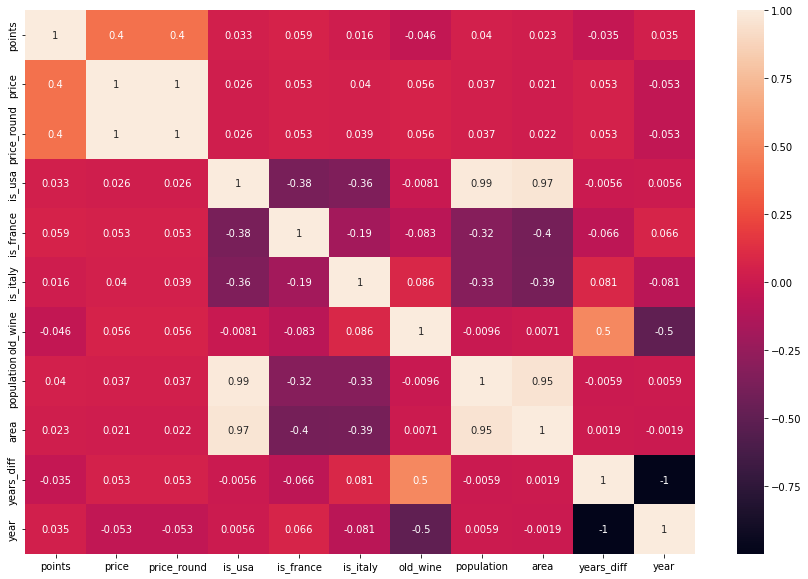

In [262]:
import seaborn as sns # импортируем seaborn для построения графиков
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10)) 
g = sns.heatmap(data.corr(), annot=True, )


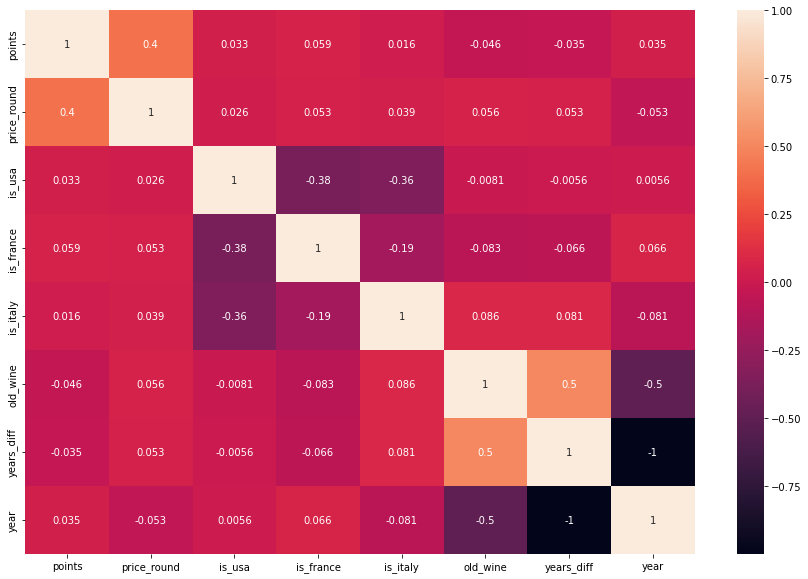

In [263]:
data= data.drop(['price', 'population', 'area'], axis=1)
fig, ax = plt.subplots(figsize=(15,10)) 
g = sns.heatmap(data.corr(), annot=True, )